In [1]:
import pandas as pd
import numpy as np
import sys
import os
if "../" not in sys.path:
  sys.path.append("../") 
import os
os.chdir("..") 
from envs.data_handler import DataHandler, perform_ttest

frames = []

dh = DataHandler(environment='Saturating')
dh.data.head()

,Optimal_Affected_Component,Optimal_Affected_Component_Uid,Optimal_Failure,raw,cube,sqt,log10,ln,log2
0,Query Service,_SEwwu-cdEeet0YmmfbMwkw,CF1,638.460292,5.558599,13.105330,2.234896,5.146038,7.424164
1,Last Second Sales Item Filter,_SExXrOcdEeet0YmmfbMwkw,CF2,96.674251,4.920383,10.914362,2.075997,4.780159,6.896312
2,Buy Now Item Filter,_SEx_ROcdEeet0YmmfbMwkw,CF5,111.194731,4.920383,10.914362,2.075997,4.780159,6.896312
3,Availability Item Filter,_SEymNucdEeet0YmmfbMwkw,CF5,36.912446,4.594071,9.846831,1.986593,4.574299,6.599319
4,Past Sales Item Filter,_SEx-n-cdEeet0YmmfbMwkw,CF3,96.960084,3.559606,6.715880,1.654206,3.808950,5.495153


In [2]:
total = len(dh.data.index)
groups = dh.data.groupby(['Optimal_Affected_Component_Uid', 'Optimal_Failure']).ngroups

print('We have ' + str(groups) + ' unqiue combinations of <component, failure> and at total ' + str(total) + ' data points.')

We have 891 unqiue combinations of <component, failure> and at total 2732 data points.


# Task 1: Plot the distribution 

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

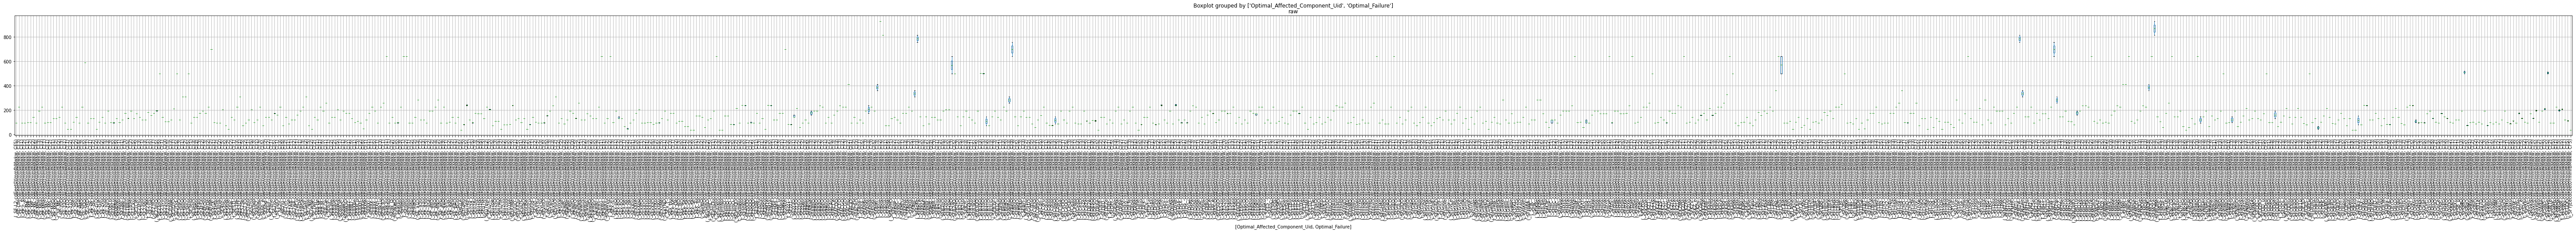

In [3]:
import matplotlib.pyplot as plt
dh.data.boxplot(by=['Optimal_Affected_Component_Uid', 'Optimal_Failure'], column="raw", figsize=(100,5), showfliers=False)
plt.xticks(rotation='vertical')

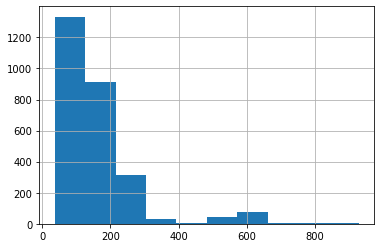

In [4]:
dh.data['raw'].hist()

# Task 2: Compute statistics

* mean = average of the numbers
* median = separating the higher half from the lower half
* mode = the value that appears most often, it can be multiple values
* std = standard deviation
* skew = skewness, measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
* kurtosis = measure of the "tailedness" of the probability distribution of a real-valued random variable

In [5]:
untransformed_data = dh.data[['Optimal_Affected_Component_Uid','Optimal_Failure','raw']]

## Mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1211c3760>]],
      dtype=object)

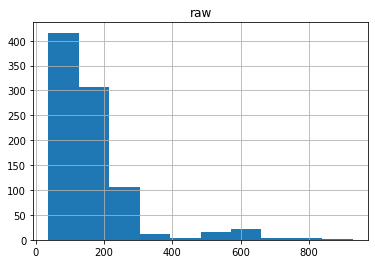

In [6]:
mean_values = untransformed_data.groupby(['Optimal_Affected_Component_Uid', 'Optimal_Failure']).agg('mean')
mean_values.hist()

In [7]:
# get the outliers
mean_group = mean_values.apply(lambda x: x)
mean_group[mean_group.raw > 1700]

,,raw
Optimal_Affected_Component_Uid,Optimal_Failure,


## Median

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125c40250>]],
      dtype=object)

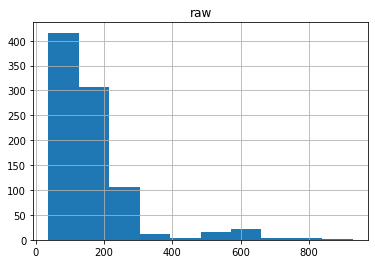

In [8]:
median = untransformed_data.groupby(['Optimal_Affected_Component_Uid', 'Optimal_Failure']).agg('median')
median.hist()

In [9]:
# get the outliers
group = median.apply(lambda x: x)
group[group.raw > 600]

raw
Optimal_Affected_Component_Uid Optimal_Failure            
_SE4FWecdEeet0YmmfbMwkw        CF2              696.502137
_SE9k3ucdEeet0YmmfbMwkw        CF1              638.460292
_SE9lfucdEeet0YmmfbMwkw        CF1              638.460292
                               CF2              638.460292
_SEwwu-cdEeet0YmmfbMwkw        CF1              638.460292
_SEx-lecdEeet0YmmfbMwkw        CF2              638.460292
_SEymIucdEeet0YmmfbMwkw        CF2              638.460292
_SEzNFecdEeet0YmmfbMwkw        CF1              696.502137
_SFAoiecdEeet0YmmfbMwkw        CF2              928.669515
                               CF3              812.585826
_SFApKecdEeet0YmmfbMwkw        CF3              783.564904
_SFBPiOcdEeet0YmmfbMwkw        CF3              696.502137
_SFFhxucdEeet0YmmfbMwkw        CF1              638.460292
_SFGIEOcdEeet0YmmfbMwkw        CF1              638.460292
_SFJyKecdEeet0YmmfbMwkw        CF1              638.460292
_SFJyyecdEeet0YmmfbMwkw        CF1              638.460292
_SFJzaecdEeet0YmmfbMwkw        CF1              638.460292
_SFKZOecdEeet0YmmfbMwkw        CF1              638.460292
_SFKaeecdEeet0YmmfbMwkw        CF2              638.460292
_SFLAhecdEeet0YmmfbMwkw        CF2              638.460292
_SFLomecdEeet0YmmfbMwkw        CF2              638.460292
_SFM1w-cdEeet0YmmfbMwkw        CF3              783.564904
_SFM2Y-cdEeet0YmmfbMwkw        CF3              696.502137
_SFMO7ecdEeet0YmmfbMwkw        CF2              638.460292
_SFMPjecdEeet0YmmfbMwkw        CF2              638.460292
_SFMQLecdEeet0YmmfbMwkw        CF2              638.460292
                               CF3              870.627671
_SFNcZOcdEeet0YmmfbMwkw        CF3              638.460292
_SFNdBOcdEeet0YmmfbMwkw        CF3              638.460292

## Mode

(array([499., 355., 125.,  16.,   5.,  25.,  25.,   2.,   8.,   2.]),
 array([ 36.91244634, 126.08815325, 215.26386015, 304.43956706,
        393.61527396, 482.79098087, 571.96668778, 661.14239468,
        750.31810159, 839.49380849, 928.6695154 ]),
 <a list of 10 Patch objects>)

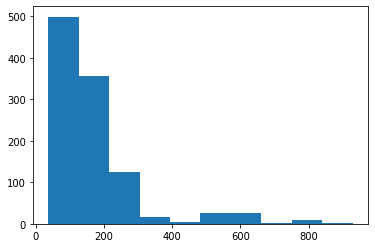

In [10]:
import operator
import functools

mode = untransformed_data.groupby(['Optimal_Affected_Component_Uid', 'Optimal_Failure']).agg(pd.Series.mode)
mode_values = mode['raw'].values
mode_flatten = np.hstack(mode_values).tolist()

plt.hist(mode_flatten)

In [11]:
# get the outliers
mode_group = mode.apply(lambda x: x)
high_values = []
for index, row in mode_group.iterrows():
    if isinstance(row['raw'], np.ndarray):
        for value in row['raw']:
            if value >= 400:
                high_values.append([str(index), value])
    else:
        if row['raw'] >= 400:
            high_values.append([str(index), row['raw']])

print('Outliers:')
for value in high_values:
    print(value)

Outliers:
["('_SE-zOOcdEeet0YmmfbMwkw', 'CF5')", 588.8567922999998]
["('_SE23oOcdEeet0YmmfbMwkw', 'CF5')", 498.26343960000014]
["('_SE2Qd-cdEeet0YmmfbMwkw', 'CF5')", 498.26343960000014]
["('_SE3ehucdEeet0YmmfbMwkw', 'CF5')", 498.26343960000014]
["('_SE4FWecdEeet0YmmfbMwkw', 'CF2')", 696.5021365]
["('_SE9k3ucdEeet0YmmfbMwkw', 'CF1')", 638.4602917999998]
["('_SE9lfucdEeet0YmmfbMwkw', 'CF1')", 638.4602917999998]
["('_SE9lfucdEeet0YmmfbMwkw', 'CF2')", 638.4602917999998]
["('_SEwwu-cdEeet0YmmfbMwkw', 'CF1')", 638.4602917999998]
["('_SEx-lecdEeet0YmmfbMwkw', 'CF2')", 638.4602917999998]
["('_SEymIucdEeet0YmmfbMwkw', 'CF2')", 638.4602917999998]
["('_SEzNFecdEeet0YmmfbMwkw', 'CF1')", 696.5021365]
["('_SFACHucdEeet0YmmfbMwkw', 'CF2')", 412.4705039]
["('_SFAoh-cdEeet0YmmfbMwkw', 'CF3')", 412.4705039]
["('_SFAoiecdEeet0YmmfbMwkw', 'CF2')", 928.6695154]
["('_SFAoiecdEeet0YmmfbMwkw', 'CF3')", 812.5858258999998]
["('_SFApKecdEeet0YmmfbMwkw', 'CF3')", 754.5439812000002]
["('_SFApKecdEeet0YmmfbMwkw', '

## standard deviation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d8b4cd0>]],
      dtype=object)

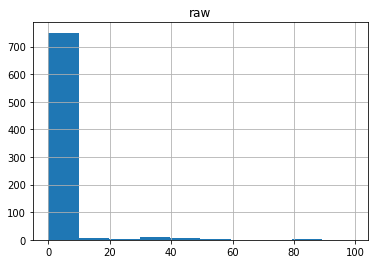

In [12]:
std = untransformed_data.groupby(['Optimal_Affected_Component_Uid', 'Optimal_Failure']).agg('std')
std.hist()

In [13]:
# get the outliers
std_group = std.apply(lambda x: x)
std_group[std_group.raw > 2]

,,raw
Optimal_Affected_Component_Uid,Optimal_Failure,
_SEu7eecdEeet0YmmfbMwkw,CF5,2.754024
_SEuUMecdEeet0YmmfbMwkw,CF5,2.183675
_SEvio-cdEeet0YmmfbMwkw,CF5,13.213809
_SEx-pOcdEeet0YmmfbMwkw,CF2,32.438275
_SEx-qecdEeet0YmmfbMwkw,CF2,11.275760
_SEz0QOcdEeet0YmmfbMwkw,CF2,11.330149
_SEzz3OcdEeet0YmmfbMwkw,CF1,35.592737
_SFABaecdEeet0YmmfbMwkw,CF3,22.751878
_SFAofecdEeet0YmmfbMwkw,CF3,41.602427


## skewness
measure of the asymmetry of the probability distribution of a real-valued random variable about its mean

In [14]:
values = untransformed_data['raw']
values.skew()

2.971931027198917

In [21]:
# we have positive skewed data
(values.mode() < values.median()) & (values.median() < values.mean())

0    True
dtype: bool

## kurtosis
measure of the "tailedness" of the probability distribution of a real-valued random variable

In [16]:
kurtosis = untransformed_data['raw'].kurt()
kurtosis

10.172158689787237

In [17]:
# having leptokurtical data
exzess = kurtosis - 3
exzess > 0

True

# Result:

* The combination of <Query Service,CF5> shows particular high values
* We have a positive skewness, that increases the probability to get a lower value compared to the average.
* We have leptokurtical data what means that the values are distributed over a small range.